In [1]:
from actorcritic import ActorCriticAgent, EnvironmentWrapper
import gymnasium as gym
import datetime
import numpy as np

In [2]:
# hyperparameters
config = {
    'experiment': 'CartPole',
    'device': 'cuda',
    'state_size': 6, 
    'action_size': 3,
    'hidden_sizes': [64, 128, 64], 
    'lr_actor': 0.001,
    'lr_critic': 0.005,
    'verbosity': 10,
    'env_name': 'CartPole-v1',
    'gamma': 0.99, 
    'reward_threshold': 475.0,
    'max_episodes': 2000,
    'max_steps': 500,
    'update_frequency': 500

}

In [3]:
# Initialize the environment
env = gym.make(config['env_name'])
env_wrapper = EnvironmentWrapper(env)

# Initialize the ActorCriticAgent
agent = ActorCriticAgent(config)

2024-03-11 17:22:17.590592: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-11 17:22:17.652136: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 17:22:17.652182: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 17:22:17.653619: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-11 17:22:17.664368: I tensorflow/core/platform/cpu_feature_guar

In [4]:
results = agent.train(env_wrapper, max_episodes=config['max_episodes'], max_steps=config['max_steps'], reward_threshold=config['reward_threshold'], update_frequency=config['update_frequency'])

Episode 0, Avg Reward: 13.0, PLoss: 14.324577331542969, VLoss: 12.761950492858887
Episode 10, Avg Reward: 16.272727272727273, PLoss: 10.970671653747559, VLoss: 112.86027526855469
Episode 20, Avg Reward: 15.857142857142858, PLoss: -2.0862836837768555, VLoss: 134.41465759277344
Episode 30, Avg Reward: 15.129032258064516, PLoss: -1.7378361225128174, VLoss: 95.7403564453125
Episode 40, Avg Reward: 15.634146341463415, PLoss: 4.772223472595215, VLoss: 54.73583984375
Episode 50, Avg Reward: 16.11764705882353, PLoss: -5.672802925109863, VLoss: 14.988238334655762
Episode 60, Avg Reward: 17.62295081967213, PLoss: 1.4656896591186523, VLoss: 1143.703125
Episode 70, Avg Reward: 17.535211267605632, PLoss: 28.629648208618164, VLoss: 37.54973602294922
Episode 80, Avg Reward: 16.925925925925927, PLoss: -0.030973084270954132, VLoss: 9.057308197021484
Episode 90, Avg Reward: 16.934065934065934, PLoss: 15.52943229675293, VLoss: 55.10008239746094
Episode 100, Avg Reward: 17.76, PLoss: -14.566880226135254, 

In [5]:
# Save the models
agent.save_models()

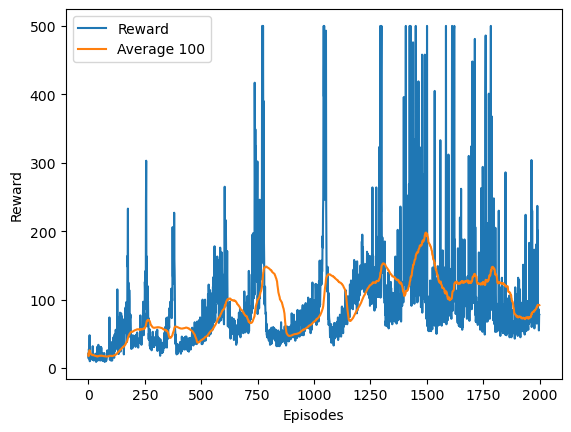

In [6]:
# plot results
import matplotlib.pyplot as plt

plt.plot(results['Episode'], results['Reward'], label='Reward')
plt.plot(results['Episode'], results['Average_100'], label='Average 100')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend()
plt.show()


In [7]:
np.save(f'results/{config["experiment"]}', results)

In [12]:
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [13]:
%tensorboard --logdir runs/